## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('online_retail_II.csv')
data.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [3]:
data.shape

(1067371, 8)

In [4]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [7]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(34335)

In [9]:
data.shape

(1067371, 8)

In [10]:
data.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
504858,536544,21212,PACK OF 72 RETROSPOT CAKE CASES,8,2010-12-01 14:32:00,1.28,NaN,United Kingdom
918574,570797,21774,DECORATIVE CATS BATHROOM BOTTLE,96,2011-10-12 12:24:00,1.06,15311.0,United Kingdom
392462,527107,84536B,FAIRY CAKES NOTEBOOK A7 SIZE,16,2010-10-14 17:16:00,0.42,15626.0,United Kingdom


In [11]:
data[data['Country']=='Unspecified'].shape
# There are 752 data points where country is not specified

(756, 8)

In [12]:
pd.options.display.float_format = '{:20.2f}'.format

In [13]:
data.describe()
# There is a -ve values in price and quantity

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [14]:
data.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom


In [15]:
data['Price'].min(), data['Price'].max()

(np.float64(-53594.36), np.float64(38970.0))

In [16]:
data['Quantity'].min(), data['Quantity'].max()

(np.int64(-80995), np.int64(80995))

In [17]:
print(data['Invoice'].dtype)
print(data['StockCode'].dtype)


object
object


### Data Cleaning and Manipulation

In [18]:
df = data.copy()

In [19]:
df.shape

(1067371, 8)

In [20]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [21]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [22]:
data['Invoice'].value_counts()
# we have some Alphabets in this Invoice code

Invoice
537434     1350
538071     1304
537638     1202
537237     1194
536876     1186
           ... 
517214        1
517215        1
C517219       1
C517220       1
C489541       1
Name: count, Length: 53628, dtype: int64

In [23]:
df['Invoice'] = df['Invoice'].astype('str')

mask = (
    df['Invoice'].str.match("^\\d{6}$")==True
)
df = df[mask]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


In [24]:
df['Invoice'].value_counts()
# All the C is removed from the front

Invoice
537434    1350
538071    1304
537638    1202
537237    1194
536876    1186
          ... 
520165       1
563727       1
563740       1
563742       1
504531       1
Name: count, Length: 45330, dtype: int64

In [25]:
weird_code = df[df['StockCode'].str.len()>5]
weird_code['StockCode'].value_counts()

StockCode
85123A      5694
85099B      4130
82494L      2070
85099C      1926
85099F      1890
            ... 
84031b         1
DCGS0057       1
DCGS0074       1
DCGS0055       1
85034b         1
Name: count, Length: 1702, dtype: int64

In [26]:
df['StockCode'] = df['StockCode'].astype('str')
mask_2 = (
    df['StockCode'].str.match(r"^\d{5}[A-Z]$") |  # 5 digits + single letter
    df['StockCode'].str.match(r"^\d{5}$")   |     # 5 digits only
    df['StockCode'].eq("PADs")
)
df = df[mask_2]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [27]:
df.shape

(1038456, 8)

In [28]:
df.describe()

,Quantity,Price,Customer ID
count,1038456.00,1038456.00,801620.00
mean,10.66,3.31,15338.05
std,135.68,4.73,1693.90
min,-9600.00,0.00,12346.00
25%,1.00,1.25,13988.00
50%,3.00,2.10,15276.00
75%,11.00,4.13,16809.00
max,80995.00,1157.15,18287.00


In [29]:
df.isnull().sum().sort_values(ascending=False)

Customer ID    236836
Description      4315
StockCode           0
Invoice             0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

In [30]:
df.dropna(subset=['Customer ID'], inplace= True)

C:\Users\MR OSMAN\AppData\Local\Temp\ipykernel_7500\1609636436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Customer ID'], inplace= True)


In [31]:
df.shape

(801620, 8)

In [32]:
df.describe()

,Quantity,Price,Customer ID
count,801620.00,801620.00,801620.00
mean,13.34,2.93,15338.05
std,144.63,4.28,1693.90
min,1.00,0.00,12346.00
25%,2.00,1.25,13988.00
50%,5.00,1.95,15276.00
75%,12.00,3.75,16809.00
max,80995.00,649.50,18287.00


In [33]:
len(df[df['Price']==0])

61

In [34]:
df = df[df['Price']>0]
# Remove the 0 Price columns

In [35]:
len(df)/len(data)
# we lost about 25% of our data 

0.7509656904675132

### Feature Engineering

In [36]:
df.describe()

,Quantity,Price,Customer ID
count,801559.00,801559.00,801559.00
mean,13.32,2.93,15338.14
std,143.96,4.28,1693.87
min,1.00,0.03,12346.00
25%,2.00,1.25,13988.00
50%,5.00,1.95,15276.00
75%,12.00,3.75,16809.00
max,80995.00,649.50,18287.00


In [37]:
df['Total_Price'] = df['Quantity']*df['Price']
df.head(3)

C:\Users\MR OSMAN\AppData\Local\Temp\ipykernel_7500\2063335184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Price'] = df['Quantity']*df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00


In [38]:
df['Customer ID'].value_counts()

Customer ID
17841.00    12870
14911.00    11045
12748.00     7187
14606.00     6541
14096.00     5093
            ...  
14705.00        1
14266.00        1
15668.00        1
15686.00        1
13829.00        1
Name: count, Length: 5852, dtype: int64

In [39]:
df['Customer ID'] = df['Customer ID'].astype('int')

C:\Users\MR OSMAN\AppData\Local\Temp\ipykernel_7500\1635561617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = df['Customer ID'].astype('int')


In [40]:
df.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80


In [41]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

C:\Users\MR OSMAN\AppData\Local\Temp\ipykernel_7500\495884395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


In [42]:
ag_df = df.groupby(by='Customer ID', as_index=False).agg(
    MonetryValues = ('Total_Price','sum'),
    Frequency = ('Invoice', 'nunique'),
    LastInvoiceDate = ('InvoiceDate', 'max')
)
ag_df

,Customer ID,MonetryValues,Frequency,LastInvoiceDate
0,12346,77347.01,3,2011-01-18 10:01:00
1,12347,5633.32,8,2011-12-07 15:52:00
2,12348,1658.40,5,2011-09-25 13:13:00
3,12349,3678.69,3,2011-11-21 09:51:00
4,12350,294.40,1,2011-02-02 16:01:00
...,...,...,...,...
5847,18283,2730.70,22,2011-12-06 12:02:00
5848,18284,411.68,1,2010-10-04 11:33:00
5849,18285,377.00,1,2010-02-17 10:24:00
5850,18286,1246.43,2,2010-08-20 11:57:00


In [43]:
max_invoice_date = ag_df['LastInvoiceDate'].max()
type(max_invoice_date)

pandas._libs.tslibs.timestamps.Timestamp

In [44]:
ag_df['Recency'] = (max_invoice_date - ag_df['LastInvoiceDate']).dt.days
ag_df.head(4)

,Customer ID,MonetryValues,Frequency,LastInvoiceDate,Recency
0,12346,77347.01,3,2011-01-18 10:01:00,325
1,12347,5633.32,8,2011-12-07 15:52:00,1
2,12348,1658.40,5,2011-09-25 13:13:00,74
3,12349,3678.69,3,2011-11-21 09:51:00,18


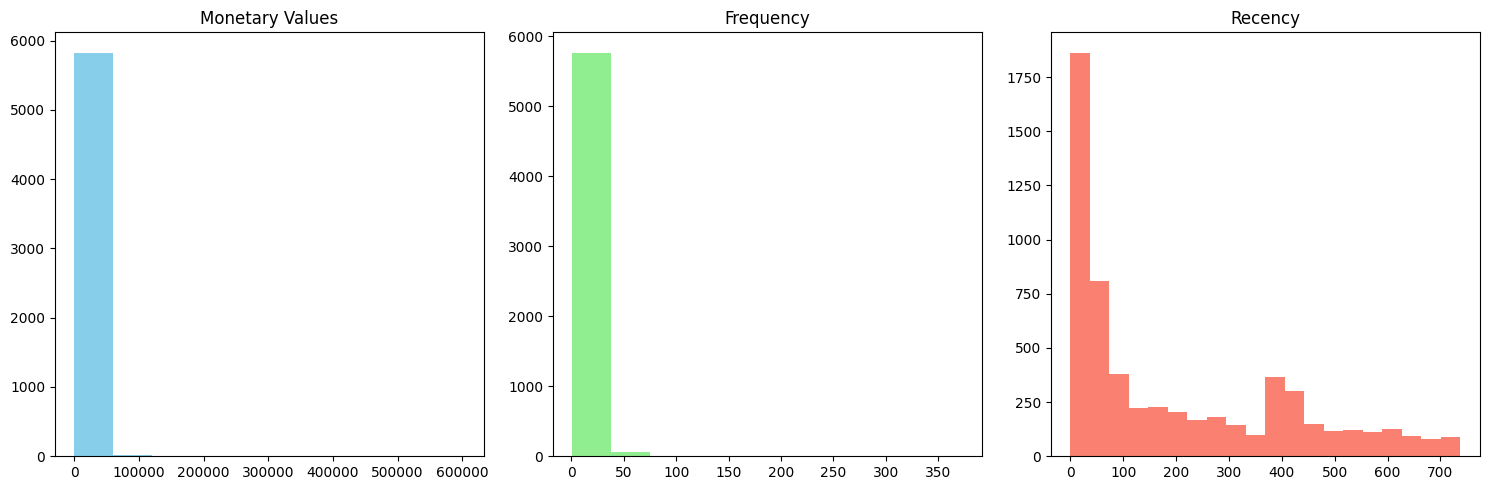

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))   # make one big figure

# 1st subplot
plt.subplot(1, 3, 1)  
plt.hist(ag_df['MonetryValues'], bins=10, color='skyblue')
plt.title("Monetary Values")

# 2nd subplot
plt.subplot(1, 3, 2)
plt.hist(ag_df['Frequency'], bins=10, color='lightgreen')
plt.title("Frequency")

# 3rd subplot
plt.subplot(1, 3, 3)
plt.hist(ag_df['Recency'], bins=20, color='salmon')
plt.title("Recency")

plt.tight_layout()
plt.show()


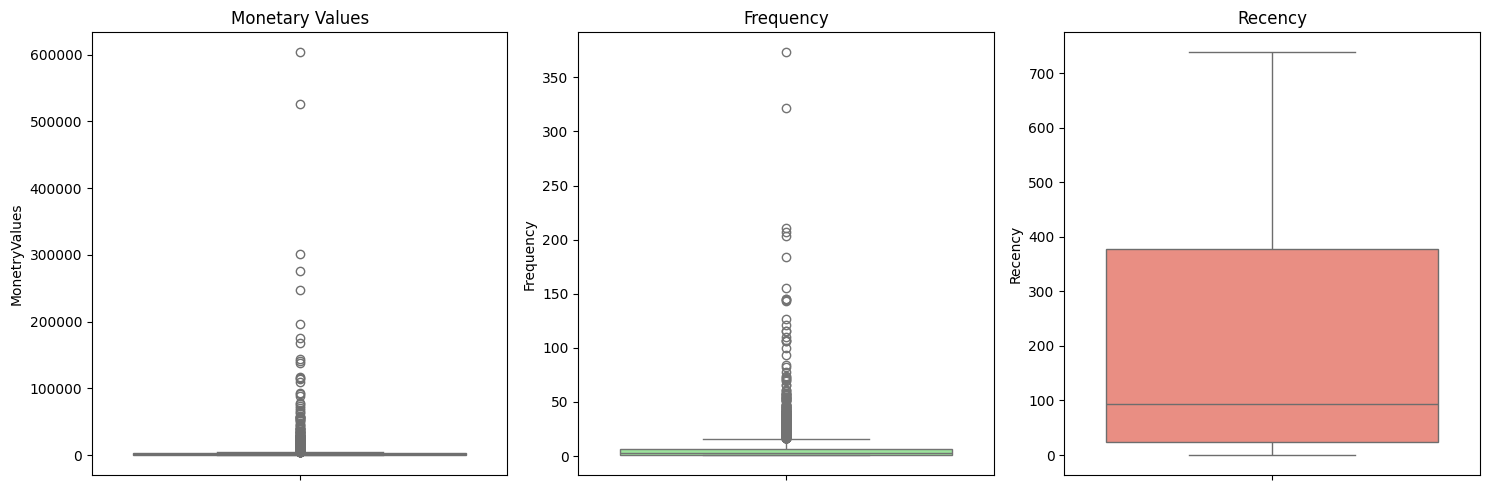

In [46]:
import seaborn as sns

plt.figure(figsize=(15,5))   # make one big figure

# 1st subplot
plt.subplot(1, 3, 1)  
sns.boxplot(ag_df['MonetryValues'], color='skyblue')
plt.title("Monetary Values")

# 2nd subplot
plt.subplot(1, 3, 2)
sns.boxplot(ag_df['Frequency'], color='lightgreen')
plt.title("Frequency")

# 3rd subplot
plt.subplot(1, 3, 3)
sns.boxplot(ag_df['Recency'], color='salmon')
plt.title("Recency")

plt.tight_layout()
plt.show()

In [47]:
M_q1 = ag_df['MonetryValues'].quantile(0.25)
M_q3 = ag_df['MonetryValues'].quantile(0.75)
M_iqr = M_q3-M_q1
M_iqr

np.float64(1939.1425000000002)

In [48]:
out_df = ag_df[(ag_df['MonetryValues']>(M_q3+1.5*M_iqr))|(ag_df['MonetryValues']<(M_q1-1.5*M_iqr))].copy()

In [49]:
out_df.describe()

,Customer ID,MonetryValues,Frequency,LastInvoiceDate,Recency
count,622.00,622.00,622.00,622,622.00
mean,15080.09,18143.65,25.91,2011-10-19 00:01:24.598070784,51.05
min,12346.00,5192.63,1.00,2010-01-17 11:33:00,0.00
25%,13579.50,6557.68,12.00,2011-10-22 01:34:00,4.00
50%,14924.00,9037.46,18.00,2011-11-23 12:26:30,16.00
75%,16608.50,14429.62,28.75,2011-12-05 09:09:15,47.75
max,18260.00,603421.65,373.00,2011-12-09 12:49:00,691.00
std,1753.54,41489.47,31.11,NaN,102.73


In [50]:
F_q1 = ag_df['Frequency'].quantile(0.25)
F_q3 = ag_df['Frequency'].quantile(0.75)
F_iqr = F_q3-F_q1
F_iqr

np.float64(6.0)

In [51]:
f_out_df = ag_df[(ag_df['Frequency']>(F_q3+1.5*F_iqr))|(ag_df['Frequency']<(F_q1-1.5*F_iqr))].copy()
f_out_df.describe()

,Customer ID,MonetryValues,Frequency,LastInvoiceDate,Recency
count,424.00,424.00,424.00,424,424.00
mean,15373.75,21047.60,34.87,2011-11-08 06:13:43.160377344,30.79
min,12415.00,1814.49,17.00,2010-05-12 16:51:00,0.00
25%,13851.00,6350.11,20.00,2011-11-15 04:14:45,2.75
50%,15306.00,9737.57,25.00,2011-11-30 11:27:30,9.00
75%,16947.25,16673.82,35.00,2011-12-06 12:59:15,24.00
max,18283.00,603421.65,373.00,2011-12-09 12:49:00,575.00
std,1777.62,49124.86,34.68,NaN,70.63


In [52]:
non_out_df = ag_df.drop(out_df.index.union(f_out_df.index))

non_out_df.describe()

,Customer ID,MonetryValues,Frequency,LastInvoiceDate,Recency
count,5164.00,5164.00,5164.00,5164,5164.00
mean,15341.45,1129.39,3.69,2011-05-04 00:19:48.450813184,219.00
min,12348.00,2.95,1.00,2009-12-01 10:49:00,0.00
25%,13861.75,310.53,1.00,2010-11-11 12:29:00,32.00
50%,15354.00,716.89,3.00,2011-07-28 11:50:00,134.00
75%,16811.25,1573.63,5.00,2011-11-06 13:19:45,392.25
max,18287.00,5182.30,16.00,2011-12-09 12:50:00,738.00
std,1705.39,1123.43,3.19,NaN,211.14


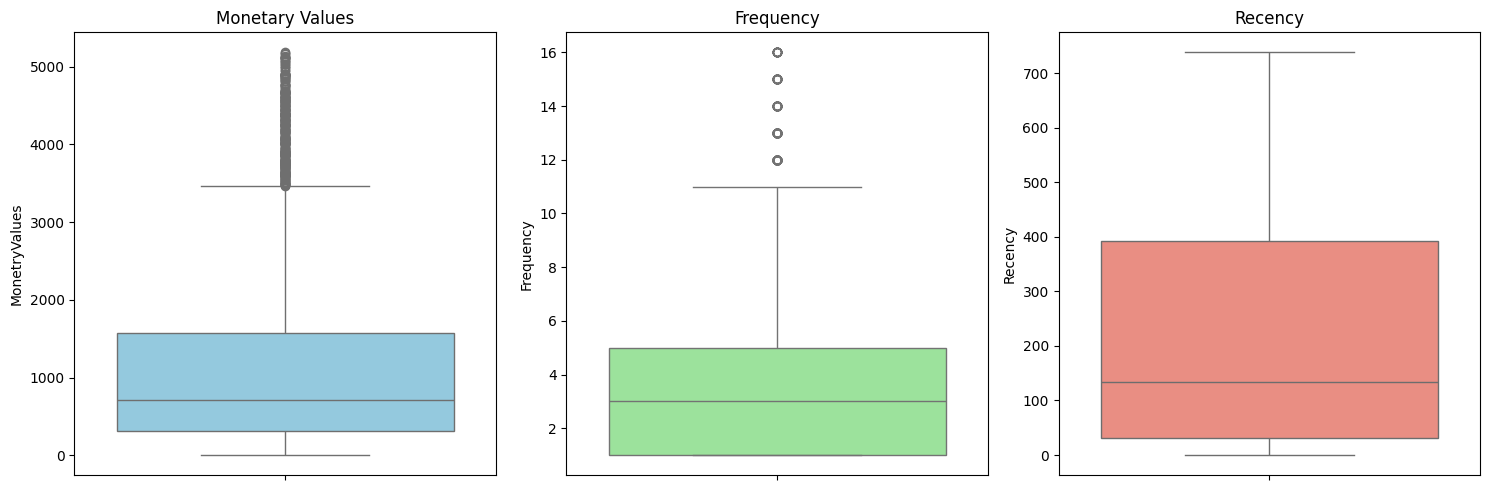

In [53]:
plt.figure(figsize=(15,5))   # make one big figure

# 1st subplot
plt.subplot(1, 3, 1)  
sns.boxplot(non_out_df['MonetryValues'], color='skyblue')
plt.title("Monetary Values")

# 2nd subplot
plt.subplot(1, 3, 2)
sns.boxplot(non_out_df['Frequency'], color='lightgreen')
plt.title("Frequency")

# 3rd subplot
plt.subplot(1, 3, 3)
sns.boxplot(non_out_df['Recency'], color='salmon')
plt.title("Recency")

plt.tight_layout()
plt.show()

In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_out_df[['MonetryValues', 'Frequency', 'Recency']])
scaled_data

array([[ 0.47092973,  0.41172239, -0.68680179],
       [ 2.26942689, -0.21499372, -0.95205823],
       [-0.7433267 , -0.84170984,  0.42632793],
       ...,
       [-0.66979475, -0.84170984,  2.08891742],
       [ 0.1041869 , -0.52835178,  1.21736053],
       [ 2.67385262,  1.0384385 , -0.8383769 ]], shape=(5164, 3))

In [55]:
scaled_data = pd.DataFrame(scaled_data, index=non_out_df.index, columns=('MonetryValues', 'Frequency', 'Recency'))
scaled_data

,MonetryValues,Frequency,Recency
2,0.47,0.41,-0.69
3,2.27,-0.21,-0.95
4,-0.74,-0.84,0.43
5,-0.74,-0.84,0.73
6,0.53,1.67,-0.87
...,...,...,...
5846,-0.85,-0.53,-1.00
5848,-0.64,-0.84,1.00
5849,-0.67,-0.84,2.09
5850,0.10,-0.53,1.22


## K Means Clustring

In [56]:
from sklearn.cluster import KMeans

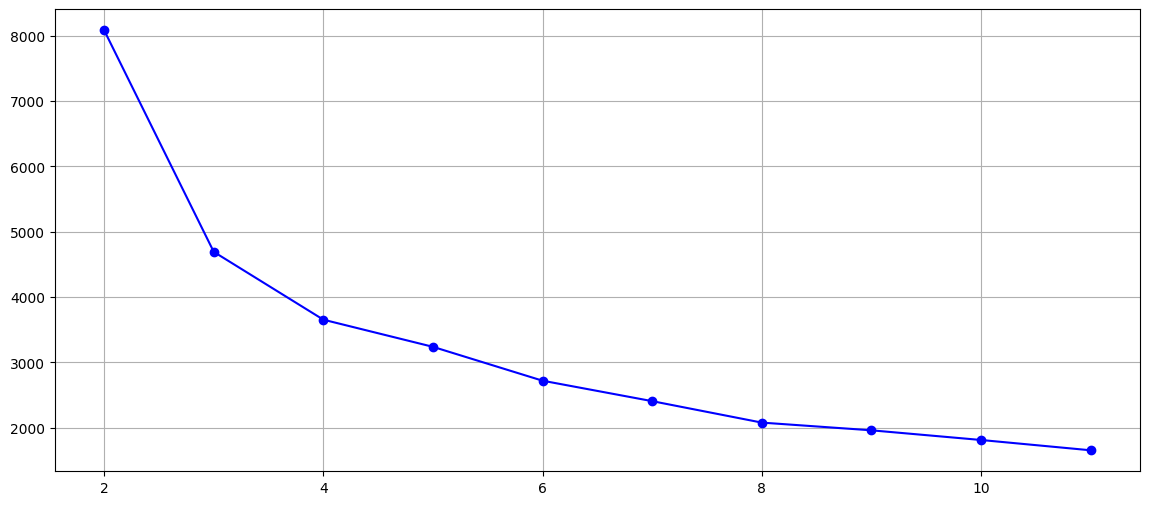

In [57]:
k_values = range(2,12)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)

# Showing the plot
plt.figure(figsize=(14,6))
plt.plot(k_values, inertia, 'bo-')
plt.grid(True)
plt.show()

*You can also check using silhouette score*

In [58]:
# we decide k=4
k_means = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_label = k_means.fit_predict(scaled_data)
cluster_label

array([2, 2, 1, ..., 1, 1, 0], shape=(5164,), dtype=int32)

In [59]:
non_out_df['Clusters'] = cluster_label

In [60]:
non_out_df

,Customer ID,MonetryValues,Frequency,LastInvoiceDate,Recency,Clusters
2,12348,1658.40,5,2011-09-25 13:13:00,74,2
3,12349,3678.69,3,2011-11-21 09:51:00,18,2
4,12350,294.40,1,2011-02-02 16:01:00,309,1
5,12351,300.93,1,2010-11-29 15:23:00,374,1
6,12352,1729.54,9,2011-11-03 14:37:00,35,2
...,...,...,...,...,...,...
5846,18282,178.05,2,2011-12-02 11:43:00,7,3
5848,18284,411.68,1,2010-10-04 11:33:00,431,1
5849,18285,377.00,1,2010-02-17 10:24:00,660,1
5850,18286,1246.43,2,2010-08-20 11:57:00,476,1


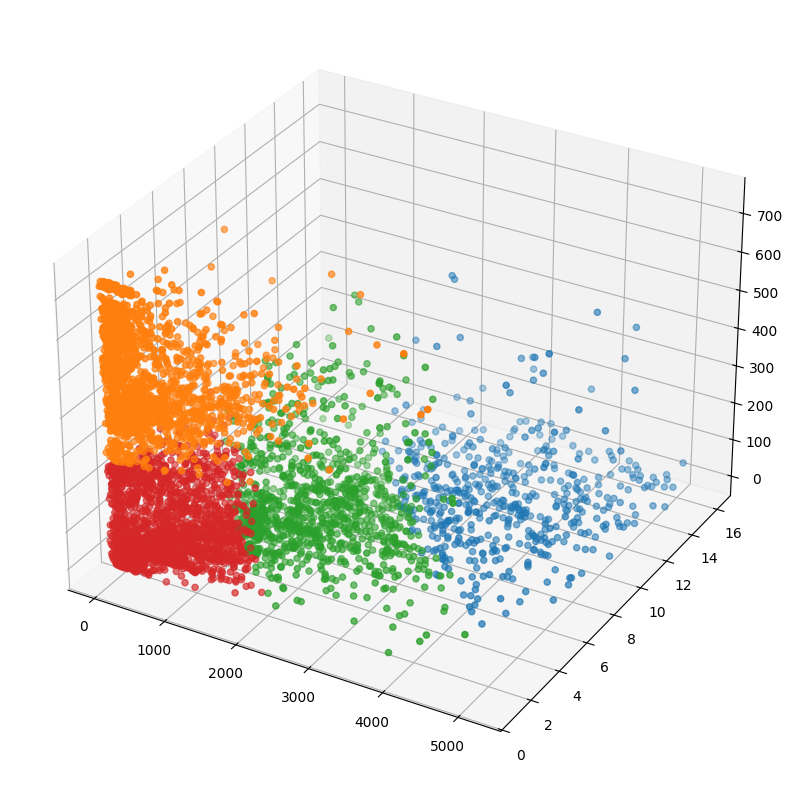

In [61]:
cluster_color = {0:'#1f77b4',
                 1:'#ff7f0e',
                 2:'#2ca02c',
                 3:'#d62728'}

colors = non_out_df['Clusters'].map(cluster_color)


from matplotlib import markers


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(non_out_df['MonetryValues'],
                     non_out_df['Frequency'],
                     non_out_df['Recency'],
                     c=colors,
                     marker='o')
plt.show()